In [1]:
import gymnasium
import highway_env

from matplotlib import pyplot as plt
from utils import record_videos, show_videos



/Users/jonah/Desktop/ReinforcementLearning/.venv/lib/python3.14/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [ ]:
env = gymnasium.make('highway-fast-v0', render_mode='rgb_array',max_episode_steps=-1)
env.unwrapped.action_type.ACTIONS_ALL


array([[-1.4086086 , -0.82880855,  0.8820678 ,  0.5111548 , -0.15608482],
       [ 0.60434717, -1.7780068 , -0.48059693, -0.53563833,  0.7172337 ],
       [-1.2147571 , -0.17262529, -1.0725163 ,  1.8722186 ,  1.0324798 ],
       [ 2.200808  , -0.81834567, -0.096817  ,  0.9291264 ,  0.3126423 ],
       [ 0.0690068 , -0.2789718 ,  1.8155538 ,  0.7332114 ,  1.2453686 ]],
      dtype=float32)

In [3]:
from algorithms.Agent import Agent
from algorithms.RDQN import RDQN

# agent = TestAgent(env)


agent: Agent = RDQN(env)

In [4]:
NUM_EPISODES = 1000
total_rewards = []
env.reset()
# env = record_videos(env)

for episode in range(NUM_EPISODES):
  print(f"Episode {episode}")
  total_reward = 0
  done = truncated = False

  obs, info = env.reset()
  while not (done or truncated):
    action = agent.predict(obs.flatten())

    next_obs, reward, done, truncated, info = env.step(action)
    total_reward += reward
    agent.learn(obs.flatten(),action,reward,(done,next_obs.flatten()))

    obs=next_obs
    env.render()
  total_rewards.append(total_reward)
  print(f"Total Reward: {total_reward}")


Episode 0
Total Reward: 4.978845409167895
Episode 1
Total Reward: 3.835096446217669
Episode 2


/Users/jonah/Desktop/ReinforcementLearning/algorithms/RDQN.py:96: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:256.)
  states      = torch.tensor(states, dtype=torch.float32)


Total Reward: 2.7488038798588166
Episode 3
Total Reward: 4.816125594846011
Episode 4
Total Reward: 6.245974685884969
Episode 5
Total Reward: 5.911873907905801
Episode 6
Total Reward: 1.9818194183852624
Episode 7
Total Reward: 13.813750118669637
Episode 8
Total Reward: 3.9125360599577723
Episode 9
Total Reward: 4.468164357261369
Episode 10
Total Reward: 7.0811532711685965
Episode 11
Total Reward: 10.146445497843619
Episode 12
Total Reward: 4.679307652733429
Episode 13
Total Reward: 6.911710196094254
Episode 14
Total Reward: 1.7333333333333334
Episode 15
Total Reward: 1.8993780516752843
Episode 16
Total Reward: 2.5987567045053694
Episode 17
Total Reward: 15.346443748273808
Episode 18
Total Reward: 1.666044718341951
Episode 19
Total Reward: 1.953097444983092
Episode 20
Total Reward: 4.250891632373114
Episode 21
Total Reward: 17.313462935519823
Episode 22
Total Reward: 8.278848837001865
Episode 23
Total Reward: 5.479353580017916
Episode 24
Total Reward: 4.279317392702511
Episode 25
Total R

KeyboardInterrupt: 

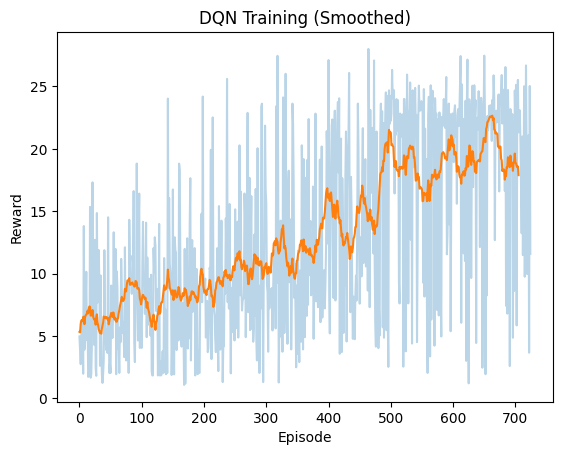

In [5]:
import matplotlib.pyplot as plt
import numpy as np

window = 20
smoothed = np.convolve(total_rewards, np.ones(window)/window, mode='valid')


plt.plot(total_rewards, alpha=0.3)
plt.plot(smoothed)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("DQN Training (Smoothed)")
plt.show()

In [6]:
NUM_EPISODES = 10
total_rewards = []
env = gymnasium.make('highway-v0', render_mode='rgb_array',config={"duration":80,"vehicles_count": 150})

for episode in range(NUM_EPISODES):
  print(f"Episode {episode}")
  done = truncated = False

  obs, info = env.reset()
  while not (done or truncated):
    action = agent.predict(obs.flatten())

    next_obs, reward, done, truncated, info = env.step(action)
    print(info)
    obs=next_obs
    env.render()


Episode 0
{'speed': 25.0, 'crashed': False, 'action': 0, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(0.0), 'high_speed_reward': np.float64(0.4944220488427259), 'on_road_reward': 1.0}}
{'speed': 20.8544411731307, 'crashed': False, 'action': 4, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(0.0), 'high_speed_reward': np.float64(0.08538174186600571), 'on_road_reward': 1.0}}
{'speed': 20.146013943668194, 'crashed': False, 'action': 1, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(0.0), 'high_speed_reward': np.float64(0.014600703439359108), 'on_road_reward': 1.0}}
{'speed': 20.024952065064255, 'crashed': False, 'action': 1, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(0.0), 'high_speed_reward': np.float64(0.0024951993641536773), 'on_road_reward': 1.0}}
{'speed': 20.004264014349108, 'crashed': False, 'action': 1, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': np.float64(0.0), 'high_speed_

KeyboardInterrupt: 